# Teorema Central Limite 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, skewnorm

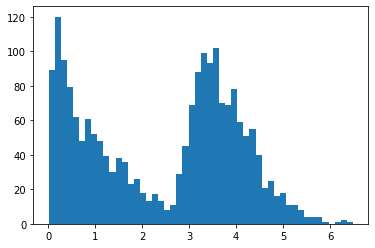

In [2]:
def obtener_datos(n):
    datos = np.concatenate((expon.rvs(scale=1, size=n//2), skewnorm.rvs(5, loc=3, size=n//2)))
    np.random.shuffle(datos)
    return datos
plt.hist(obtener_datos(2000), bins=50);

In [3]:
d10 = obtener_datos(10)
print(d10.mean())

2.2370400088756437


0.25584084413190783


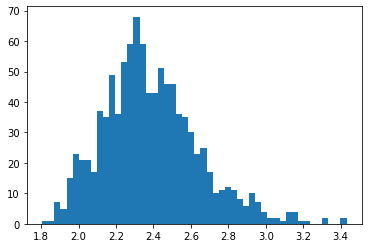

In [4]:
means = [obtener_datos(10).mean() for i in range(1000)]
plt.hist(means, bins=50)
print(np.std(means))

0.08507132994980453


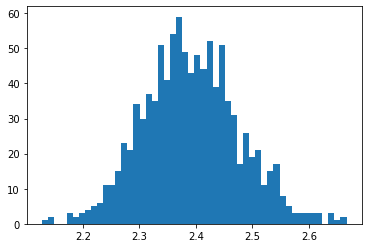

In [5]:
means = [obtener_datos(100).mean() for i in range(1000)]
plt.hist(means, bins=50)
print(np.std(means))

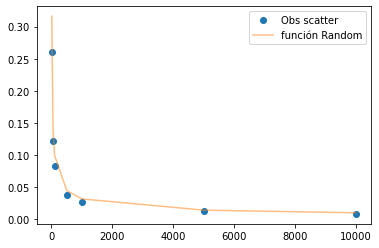

In [6]:
num_samps = [10, 50, 100, 500, 1000, 5000, 10000]
stds = []
for n in num_samps:
    stds.append(np.std([obtener_datos(n).mean() for i in range(1000)]))
plt.plot(num_samps, stds, 'o', label="Obs scatter")
plt.plot(num_samps, 1 / np.sqrt(num_samps), label="función Random", alpha=0.5)
plt.legend();

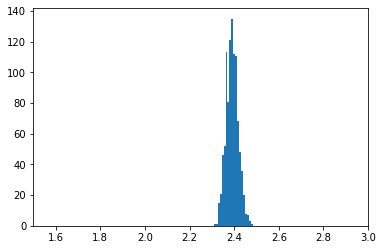

In [7]:
# Para una prueba final, pongamos esto en la misma escala que la primera ejecución pero con 1000 muestras.
plt.hist([obtener_datos(1000).mean() for i in range(1000)], bins=20);
plt.xlim(1.5,3);

# Resumen

1. La distribución de las medias muestrales se aproxima a la normalidad
2. El ancho está determinado por el número de puntos que se usan para calcular la media de cada muestra

*****

Si tiene $N$ muestras, la media de sus muestras se distribuye según una normal alrededor de la media real, con desviación estándar $\sigma/\sqrt{N}$.

O *otra* manera de decir esto, es que si pasas de $N_1$ puntos de datos a $N_2$ puntos de datos, puedes determinar la $\sqrt{N_2/N_1}$ media con mayor precisión. 4 veces más muestras no da 4 veces más precisión, solo el doble de precisión.

In [8]:
n = 1000
datos = obtener_datos(n)
muestra_media = np.mean(datos)
uncert_media = np.std(datos) / np.sqrt(n)
print(f"Se ha determinado que la media de la población de ser {muestra_media:.2f} +- {uncert_media:.2f}")

Se ha determinado que la media de la población de ser 2.38 +- 0.05


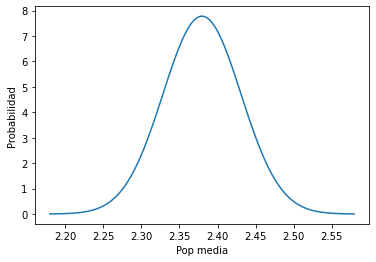

In [9]:
from scipy.stats import norm
xs = np.linspace(muestra_media - 0.2, muestra_media + 0.2, 100)
ys = norm.pdf(xs, muestra_media, uncert_media)
plt.plot(xs, ys)
plt.xlabel("Pop media")
plt.ylabel("Probabilidad");